In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [11]:
data = pd.read_csv(r'C:\Users\rutto\OneDrive\Desktop\ml-End2End\GemstonePredict\data.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [12]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [14]:
data.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [15]:
data["cut"].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [20]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [19]:
data['depth'] = data['depth'].fillna(data['depth'].mean())

In [21]:
data.shape

(26967, 11)

In [22]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [25]:
data = data.drop(['Unnamed: 0'], axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

In [27]:
print(data)
data.columns

       carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26967 rows x 10 columns]


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [30]:
data.duplicated().sum()

np.int64(0)

In [29]:
data = data.drop_duplicates()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [32]:
# data segragation into numerical and categorical 

cat_columns = data.columns[data.dtypes =='object']
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [35]:
num_columns = data.columns[data.dtypes!='object']
num_columns


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [39]:
data[num_columns]
# data[cat_columns]
# data[num_columns].info()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


In [40]:
data[num_columns].describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745282,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.393848,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [42]:
for i in cat_columns:
    print(data[i].value_counts())
    print("----------------------------------")

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64
----------------------------------
color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64
----------------------------------
clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64
----------------------------------


----------------------------------


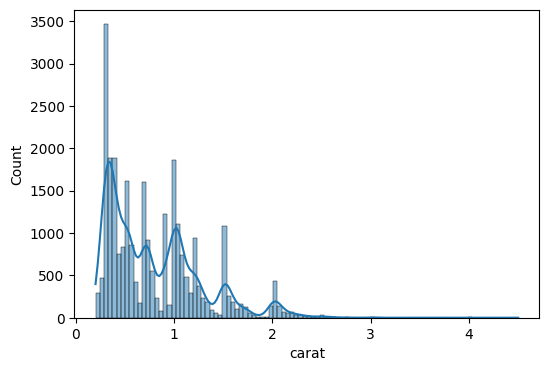

----------------------------------


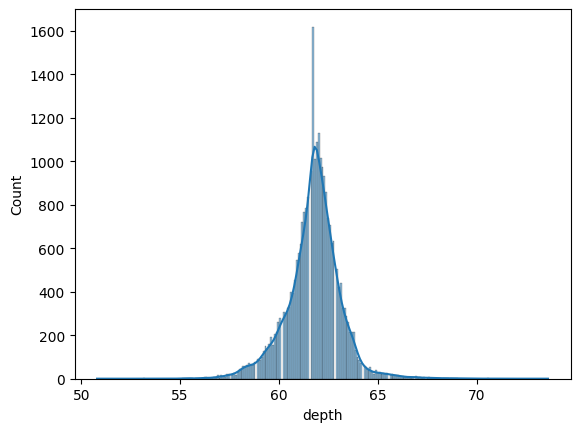

----------------------------------


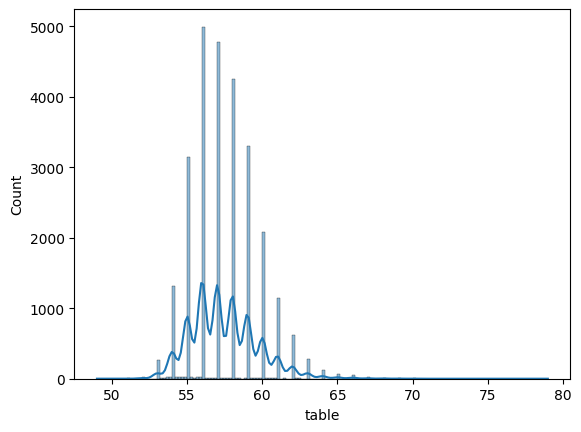

----------------------------------


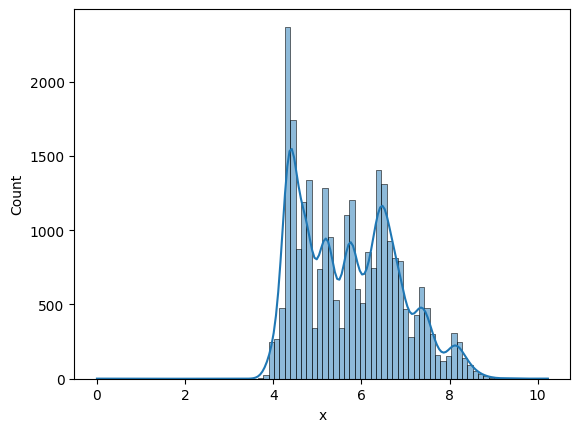

----------------------------------


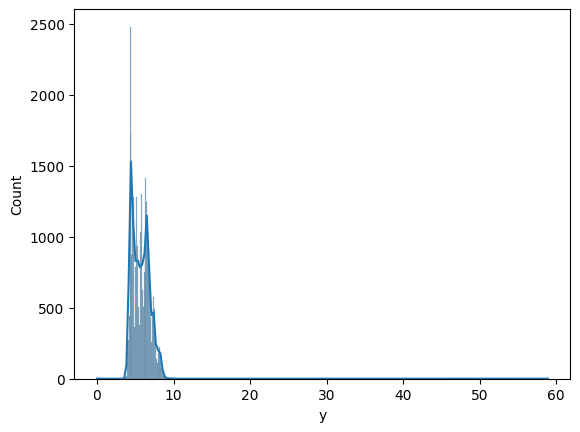

----------------------------------


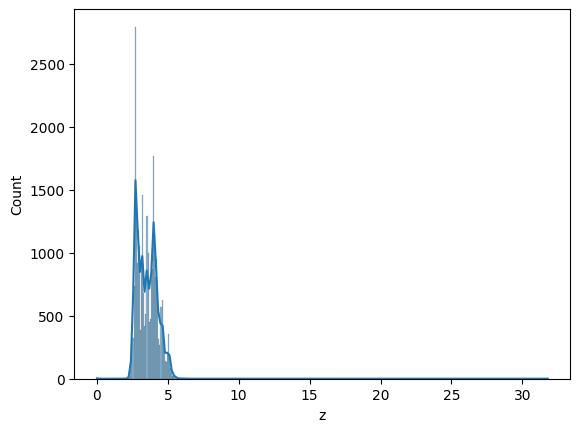

----------------------------------


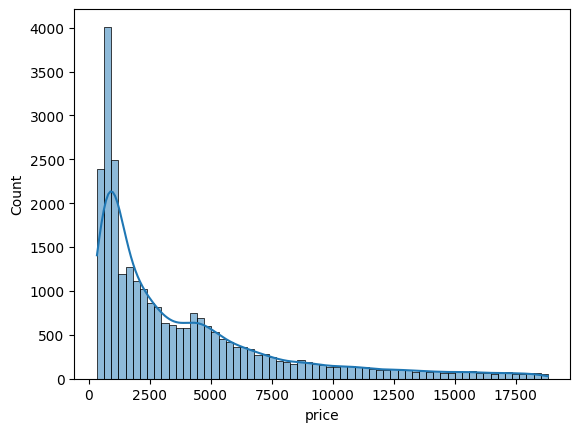

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data ,x=col, kde=True)
    print("----------------------------------")
    plt.show()  

<Axes: >

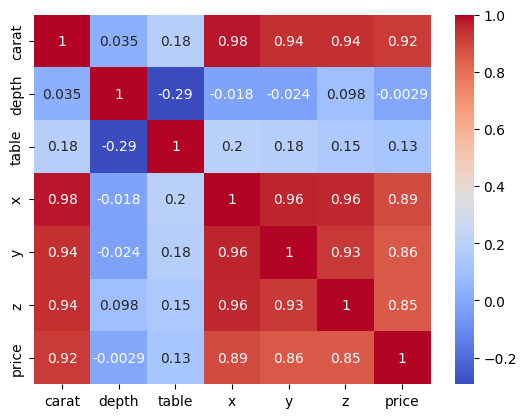

In [46]:
sns.heatmap(data[num_columns].corr(), annot=True, cmap='coolwarm')